This project tend to predict if a passenger was transported into another dimesion during the space travel.

In [87]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
csv_file = 'train.csv'
data = pd.read_csv(csv_file)

    #PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    #HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    #CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the  voyage. Passengers in cryosleep are confined to their cabins.
    #Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    Destination - The planet the passenger will be debarking to.
    #Age - The age of the passenger.
    #VIP - Whether the passenger has paid for special VIP service during the voyage.
    #RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    #Name - The first and last names of the passenger.
    #Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [88]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Sector,Side,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B,P,B/0/P,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,S,F/0/S,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A,S,A/0/S,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A,S,A/0/S,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F,S,F/1/S,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Checking the missing values, is obviously that there are some missing value in column 'HomePlanet', 'CryoSleep','Cabin','Destination','Age'...

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Sector        8494 non-null   object 
 4   Side          8494 non-null   object 
 5   Cabin         8494 non-null   object 
 6   Destination   8511 non-null   object 
 7   Age           8693 non-null   int64  
 8   VIP           8693 non-null   bool   
 9   RoomService   8693 non-null   float64
 10  FoodCourt     8693 non-null   float64
 11  ShoppingMall  8693 non-null   float64
 12  Spa           8693 non-null   float64
 13  VRDeck        8693 non-null   float64
 14  Name          8493 non-null   object 
 15  Transported   8693 non-null   bool   
dtypes: bool(3), float64(5), int64(1), object(7)
memory usage: 908.5+ KB


Since the people on the spaceship, no matter where the HomePlante and the Destination there are, the routine of the spaceship is settled, so it doesnt important where they from and go, in these case, since the homeplanet have some missing value, and by check the number of each planet, one possbile solution it to replace the missing value to Earth since it has most value.

In [5]:
data.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [6]:
data.HomePlanet = data.HomePlanet.fillna('Earth')

Same as the CryoSleep, the difference between crypslepet or not is high, what if the cryosleep or not may depend on other element, in this scenario, neaerly all the people in the missing cryosleep value is not a VIP. By checking the value in VIP, it also support that there is high possibility that if a person is not a VIP, he may not cryosleep as well.

In [7]:
data.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [8]:
data[data.CryoSleep.isnull()]['VIP'].value_counts()

False    207
True       3
Name: VIP, dtype: int64

In [9]:
data[data.VIP==False]['CryoSleep'].value_counts()

False    5143
True     2941
Name: CryoSleep, dtype: int64

In [97]:
data[data.VIP==True]['CryoSleep'].value_counts()

False    306
True      96
Name: CryoSleep, dtype: int64

In [10]:
data.CryoSleep = data.CryoSleep.fillna(False)

For the missing value in the destination, most people go to TRAPPIST-1e, but as describe before, the routine is settled, so it dont matter which destination they go to.

In [11]:
data.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

For the age, the mean and median are nearly same, so 27 or 28 are okey.

In [90]:
data.Age.describe()

count    8693.000000
mean       28.790291
std        14.341404
min         0.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

In [91]:
data.Age.median()

27.0

In [92]:
data.Age = data.Age.fillna(data.Age.median())

In [93]:
data.Age = data.Age.astype('int')

All most every people not is VIP, so the missing value could also none VIP.

In [96]:
data.VIP.value_counts()

False    8291
True      402
Name: VIP, dtype: int64

In [17]:
data.VIP = data.VIP.fillna('False')
data.VIP = data.VIP.astype('bool')

These 4 columns, since it all related to cosuming, so the minimum of the cosuming is 0, and it could be reasonable to replace the missing value with 0

In [18]:
data.fillna({'RoomService':0,'FoodCourt':0,'ShoppingMall':0,'Spa':0,'VRDeck':0},inplace=True)

The cabin is formed by the sector, number and the side, we need the info about sector and side, by applying the function to extract the info we need.

In [20]:
def sector(x):
    if type(x)!=float:
        return x[0]
def side(x):
    if type(x)!=float:
        return x[-1]
Sector = data.Cabin.apply(sector)
Side = data.Cabin.apply(side)

In [21]:
data.insert(3,column='Sector',value=Sector)
data.insert(4,column='Side',value=Side)

In [22]:
train_data = data.copy()

In [23]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.790291,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.341404,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Using labelencoder to transform the non-string value to category value.

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
encoder = LabelEncoder()

0 indicate that person didnt transported and 1 indiccate that person has been transported.

In [26]:
train_data.Transported = encoder.fit_transform(train_data.Transported)
train_data.VIP = encoder.fit_transform(train_data.VIP)
train_data.CryoSleep = encoder.fit_transform(train_data.CryoSleep)
encoder.classes_

array([False,  True])

In [37]:
#train_data.drop(columns=['PassengerId','Cabin','Destination','Name'],inplace=True)
X = train_data.drop(columns='Transported')
Y = train_data.Transported
X.Sector = encoder.fit_transform(train_x.Sector)
X.Side = encoder.fit_transform(train_x.Side)
X.HomePlanet = encoder.fit_transform(train_x.HomePlanet)

Split the data with train:test = 0.7:0.3

In [38]:
from sklearn.model_selection import train_test_split

In [43]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3)

Inspecting the countplot of transported people, the data is almost balanced.

/Users/bearpapa/miniforge3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


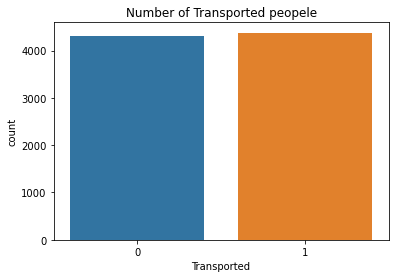

In [47]:
sns.countplot(Y)
plt.title('Number of Transported peopele')
plt.show()

Load the decision tree classifier and random forest classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix,roc_curve,roc_auc_score,accuracy_score

Try a basic decision tree, and use cross_val to check the result

In [99]:
clf = DecisionTreeClassifier()
clf.fit(train_x,train_y)
cval = cross_val_score(clf,X=train_x,y=train_y,cv=10)

the accuracy is 74.34% and using the cross validation, the max accuracy is 76.15%

In [54]:
clf.score(test_x,test_y)

0.7434815950920245

In [51]:
cval

array([0.75041051, 0.73563218, 0.72085386, 0.72413793, 0.75205255,
       0.75328947, 0.74671053, 0.74671053, 0.73026316, 0.76151316])

Plotting the confusion matrix on the test data, there 312 numbers of false negative, and 357 with false positive.

/Users/bearpapa/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


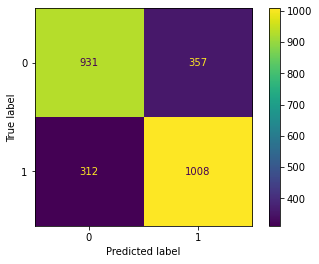

In [52]:
plot_confusion_matrix(clf,test_x,test_y)
plt.show()

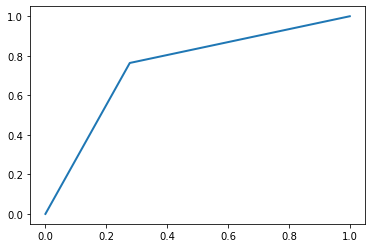

In [55]:
fpr,tpr,threshold = roc_curve(test_y,clf.predict(test_x))
plt.plot(fpr,tpr,linewidth=2)

Checking the roc_auc_score, the result is not so ideal, but not that so worse.

In [56]:
roc_auc_score(test_y,clf.predict(test_x))

0.7432312252964427

Using the GradientBoostingClassifier and also check the result.

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gbc = GradientBoostingClassifier(random_state=42,)
gbc.fit(train_x,train_y)

GradientBoostingClassifier(random_state=42)

The accuracy is 78.83%, which is better than the result in decision tree.

In [64]:
gbc.score(test_x,test_y)

0.7883435582822086

the confusion matrix show there is less on false negative and slightly less on false positive.

/Users/bearpapa/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


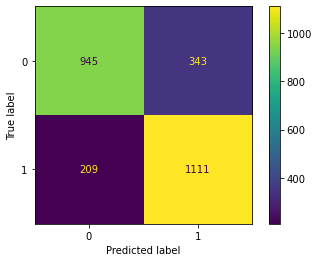

In [63]:
plot_confusion_matrix(gbc,test_x,test_y)
plt.show()

The roc_auc_score also shows that gradientboosting classifier has better performance than decision tree classifier

In [65]:
roc_auc_score(test_y,gbc.predict(test_x))

0.7876811594202899

Using grisearch to search to best param for the randomforest, and voting classifier

In [86]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = [{'n_estimators': [25, 50, 100], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]
grid = GridSearchCV(ran_clf,param_grid,cv=10)

In [80]:
grid.fit(train_x,train_y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(criterion='entropy'),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [25, 50, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}])

Given the param, restore the best estimator, and the accuracy is 78.29%.

In [83]:
new_ran_clf = grid.best_estimator_

In [82]:
grid.best_score_

0.7904675481807968

In [100]:
new_ran_clf.score(test_x,test_y)

0.7829754601226994

Using the voting classifier to vote the result by using the classifier trained early. The result is 78.68%, which is almost same as other classifier. 

In [101]:
vc = VotingClassifier(estimators=[('clf',clf),('ran',new_ran_clf),('gbc',gbc)])
vc.fit(train_x,train_y)

VotingClassifier(estimators=[('clf', DecisionTreeClassifier()),
                             ('ran',
                              RandomForestClassifier(criterion='entropy',
                                                     max_features=6,
                                                     n_estimators=50)),
                             ('gbc',
                              GradientBoostingClassifier(random_state=42))])

In [102]:
vc.score(test_x,test_y)

0.7868098159509203

 # Conclusion

By cleaning the data, transform the data and extract the feature, using the different classifier and in the end, the result reach nearly 79%, noted that the best result in the field is 81%.